# Week 1 | CV Fundamental I: Low Level Image Processing

# I. 准备工作

In [2]:
!pwd

/content


In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = '/content/drive/My Drive/Data/cv_homeworks_data/week1/'

# II. 正式开始

# Basic Operations I:

## 1. Read in & Show out

In [0]:
import cv2
import random
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

In [6]:
import os
os.listdir(data_path)

['20180723165602.jpg',
 '20180807092404.jpg',
 '20190529230603.jpg',
 '20190703151435.jpg']

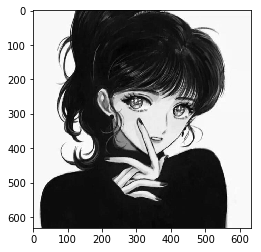

In [7]:
img_gray = cv2.imread(os.path.join(data_path, '20180723165602.jpg'), 0)
# Coding "cv2.imshow('girl', img_gray)" equals to
plt.imshow(img_gray,'gray')

In [8]:
# to show image data type
print(img_gray.dtype)
# to show gray image shape
print(img_gray.shape)  # (h, w)
# to show image matrix
print(img_gray)

uint8
(632, 632)
[[248 248 248 ... 249 249 249]
 [248 248 248 ... 249 249 249]
 [248 248 248 ... 249 249 249]
 ...
 [248 248 248 ... 249 249 249]
 [248 248 248 ... 249 249 249]
 [248 248 248 ... 249 249 249]]


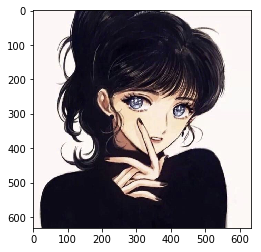

In [9]:
cv2_img = cv2.imread(os.path.join(data_path, '20180723165602.jpg'))
# OpenCV stores images in BGR, while matplotlib.pyplt in RGB(红绿蓝)
# cv2.cvtColor(**, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [10]:
print(img.shape)  # (h, w, c)
# print(img)

(632, 632, 3)


## 2. Image crop

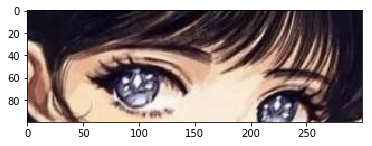

In [11]:
# image crop
img_crop = img[200:300, 200:500]  # her eyes
plt.imshow(img_crop)

## 3. Channels / Spaces

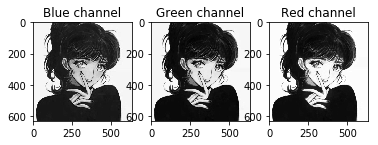

In [12]:
# plt does not have this function...
B, G, R = cv2.split(cv2_img)
# still need to add the keyword 'gray'
plt.subplot(131)
plt.title('Blue channel')
plt.imshow(B,'gray')

plt.subplot(132)
plt.title('Green channel')
plt.imshow(G,'gray')

plt.subplot(133)
plt.title('Red channel')
plt.imshow(R,'gray')

## 4. Change color (Assignment)

In [0]:
# change color
def random_light_color(img):
  """
  Add a random int between (-50, 50) to each of the three limited channels.
  ---------------------------------------------
  Parameters
    img: a original image in cv2 style (BGR)
    return: merged image (BGR)
  """
  B, G, R = cv2.split(img)
  b_rand, g_rand, r_rand = [random.randint(-50, 50) for _ in range(0, 3)]
  
  for (c, C) in zip([b_rand, g_rand, r_rand], [B, G, R]):
    if c == 0:
      pass
    elif c > 0:
      lim = 255 - c
      C[C > lim] = 255  # white: make it empty
      C[C <= lim] = (c + C[C <= lim]).astype(img.dtype)
    else:  # c < 0
      lim = 0 - c
      C[C < lim] = 0  # black
      C[C > lim] = (c + C[C > lim]).astype(img.dtype)
  img_merge = cv2.merge((B, G, R))
  return img_merge

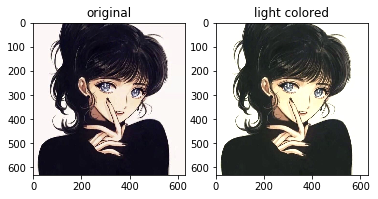

In [14]:
random.seed(40)
cv2_img_randcolor = random_light_color(cv2_img)
img_randcolor = cv2.cvtColor(cv2_img_randcolor, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title('original')
plt.imshow(img)

plt.subplot(122)
plt.title('light colored')
plt.imshow(img_randcolor)

## 5. Gamma Correction (伽马校正)

### 背景介绍：  
**灰度变换**是所有图像处理技术中最简单的一种，其中**幂律变换**用于使各种设备获取、打印和显示的图像的**灰度级**根据幂律来进行映射。**幂律方程**：  
>$s=cr^{\gamma}$,  
其中系数 $c$ 和像素值 $γ$ 为正常数。  

用于校正这些幂律响应现象的处理称为**伽马校正**。根据幂律灰度变换曲线，  
>当 $\gamma>1$ 时，显示系统产生的图像往往要比期望的图像**暗**。  

在这种情况下，需要扩展图像的灰度级，可使用指数为分数的**幂律变换**：$s=r^{1/\gamma}$。

在幂律方程中，随着 $\gamma$ 的减小，图片亮度增加，**分辨率**提高，而**对比度**下降。


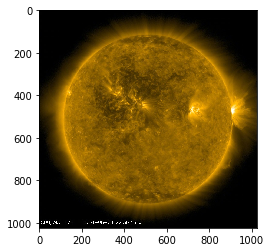

In [15]:
# gamma correction
cv2_img_dark = cv2.imread(os.path.join(data_path, '20180807092404.jpg'))
img_dark = cv2.cvtColor(cv2_img_dark, cv2.COLOR_BGR2RGB)
plt.imshow(img_dark)

In [0]:
def adjust_gamma(img, gamma=1.):
  """
  Adjust a dark image to the proper gray level.
  ---------------------------------------------
  Parameters
    img: a original image in cv2 style (BGR)
    return: corrected image (BGR)
  """
  invGamma = 1. / gamma
  table = np.array([255. * (i/255)**invGamma for i in range(256)]).astype("uint8")
  return cv2.LUT(img, table)

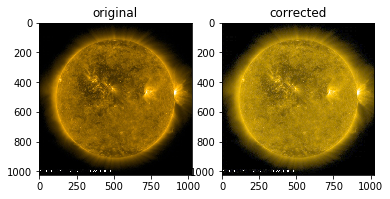

In [17]:
cv2_img_brighter = adjust_gamma(cv2_img_dark, gamma=1.5)
img_brighter = cv2.cvtColor(cv2_img_brighter, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title('original')
plt.imshow(img_dark)

plt.subplot(122)
plt.title('corrected')
plt.imshow(img_brighter)

## 6. Histogram (Thinking: adaptive & align)

(1613, 1080, 3)


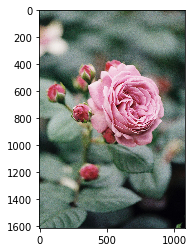

In [18]:
cv2_img_flower = cv2.imread(os.path.join(data_path, '20190703151435.jpg'))
img_flower = cv2.cvtColor(cv2_img_flower, cv2.COLOR_BGR2RGB)
print(img_flower.shape)
plt.imshow(img_flower)

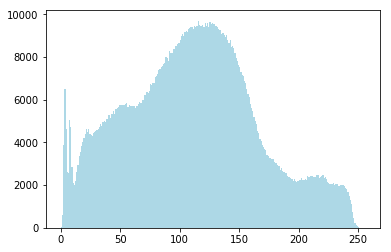

In [19]:
h, w, _ = cv2_img_flower.shape
cv2_img_small = cv2.resize(cv2_img_flower, (int(h*0.5), int(w*0.5)))
img_small = cv2.cvtColor(cv2_img_small, cv2.COLOR_BGR2RGB)
_ = plt.hist(x=img_small.flatten(), bins=256, range=[0, 256], color="lightblue")

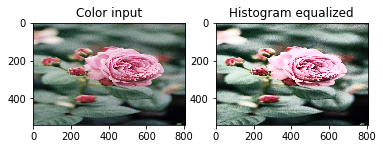

In [20]:
# y: 亮度
# u: 色度
# v: 饱和度
cv2_img_yuv = cv2.cvtColor(cv2_img_small, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel: 
# row i of histogram H is the integral of cols 0 <= j < i.
cv2_img_yuv[:, :, 0] = cv2.equalizeHist(src=cv2_img_yuv[:, :, 0])  # src: single channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(cv2_img_yuv, cv2.COLOR_YUV2RGB)
plt.subplot(121)
plt.title("Color input")
plt.imshow(img_small)

plt.subplot(122)
plt.title("Histogram equalized")
plt.imshow(img_output)

# Basic Operations II:

## 7. Similarity Transform

In [0]:
rows, cols, chs = cv2_img.shape
# size of the output image
output_size = (cols, rows)
# scale
s = 0.6
# angle
a = 30
# new center
new_center = (cols / 2, rows / 2)  # 保持变换后中心不变

In [50]:
print(new_center)

(316.0, 316.0)


### (1) Rotation

In [24]:
# Rotation
M_r = cv2.getRotationMatrix2D(center=(0, 0), angle=a, scale=1)
print(M_r)
'''
       _             _
M_r = | cosa -sina  0 |
      |_sina  cosa  0_|2x3
'''

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


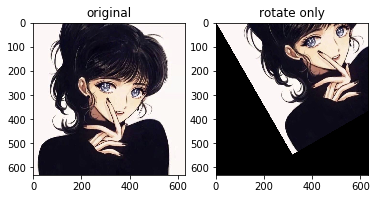

In [27]:
cv2_img_r = cv2.warpAffine(src=cv2_img, M=M_r, dsize=output_size)
img_r = cv2.cvtColor(cv2_img_r, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title("original")
plt.imshow(img)

plt.subplot(122)
plt.title("rotate only")
plt.imshow(img_r)

### (2) Scale + Rotation

In [33]:
# Scale + Rotation
M_sr = cv2.getRotationMatrix2D(center=(0, 0), angle=a, scale=s)
print(M_sr)
'''
            _             _
M_sr = s * | cosa -sina  0 |
           |_sina  cosa  0_|2x3
'''

[[ 0.51961524  0.3         0.        ]
 [-0.3         0.51961524  0.        ]]


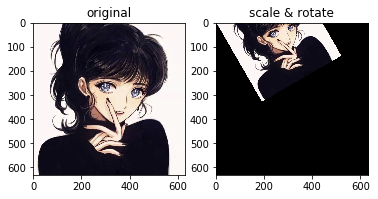

In [34]:
cv2_img_sr = cv2.warpAffine(src=cv2_img, M=M_sr, dsize=output_size)
img_sr = cv2.cvtColor(cv2_img_sr, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title("original")
plt.imshow(img)

plt.subplot(122)
plt.title("scale & rotate")
plt.imshow(img_sr)

### (3) Scale + Rotation + Translation: Similarity Transform

In [47]:
# Scale + Rotation + Translation
M_srt = cv2.getRotationMatrix2D(center=new_center, angle=a, scale=s)
print(M_srt)
'''
             _              _
M_srt = s * | cosa -sina  tx |
            |_sina  cosa  ty_|2x3
'''

[[  0.51961524   0.3         57.00158344]
 [ -0.3          0.51961524 246.60158344]]


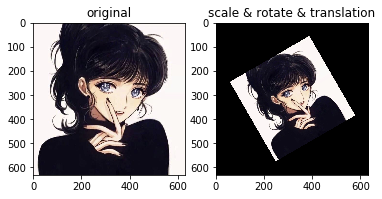

In [48]:
cv2_img_srt = cv2.warpAffine(src=cv2_img, M=M_srt, dsize=output_size)
img_srt = cv2.cvtColor(cv2_img_srt, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title("original")
plt.imshow(img)

plt.subplot(122)
plt.title("scale & rotate & translation")
plt.imshow(img_srt)

## 8. Affine Transform

In [51]:
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])

# Calculates an affine transform from three pairs of the corresponding points.
M_affine = cv2.getAffineTransform(src=pts1, dst=pts2)
print(M_affine)
'''
            _       _
M_affine = | a  b  c |
           |_d  e  f_|2x3
'''

[[ 7.01109328e-01 -1.00158480e-01  1.26400002e+02]
 [ 1.00158480e-01  8.01267808e-01  6.32000008e+01]]


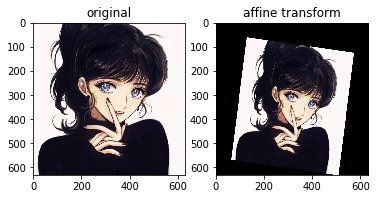

In [52]:
cv2_img_affine = cv2.warpAffine(src=cv2_img, M=M_affine, dsize=output_size)
img_affine = cv2.cvtColor(cv2_img_affine, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title("original")
plt.imshow(img)

plt.subplot(122)
plt.title("affine transform")
plt.imshow(img_affine)

## 9. Perspective Transform

In [0]:
# perspective transform
def random_warp(img):
    height, width, channels = img.shape
    random_margin = 60
    # src
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)
    
    # dst
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    # warp:
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(src=pts1, dst=pts2)
    img_warp = cv2.warpPerspective(src=img, M=M_warp, dsize=(width, height))
    return M_warp, img_warp

In [54]:
M_warp, cv2_img_warp = random_warp(cv2_img)
print(M_warp)

[[ 8.92585012e-01 -2.39107090e-02  8.62236387e+01]
 [ 3.12392076e-02  9.23835984e-01  1.25699198e+01]
 [ 7.05491421e-05 -7.31280685e-05  1.00000000e+00]]


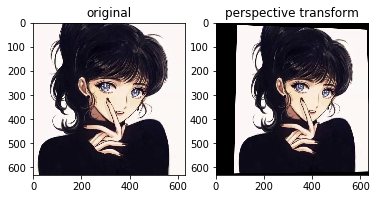

In [55]:
img_warp = cv2.cvtColor(cv2_img_warp, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.title("original")
plt.imshow(img)

plt.subplot(122)
plt.title("perspective transform")
plt.imshow(img_warp)